In [11]:
import time

import matplotlib.pyplot as plt
import mne_microstates as ms
import mne
import numpy as np
from mne.preprocessing import ICA
import neurokit2 as nk

In [12]:
raw_bv = mne.io.read_raw_brainvision('rest1_94/INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.vhdr')
raw_bv.load_data()
sampling_rate = raw_bv.info["sfreq"]

Extracting parameters from rest1_94/INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.vhdr...
Setting channel info structure...
Reading 0 ... 748677  =      0.000 ...   365.565 secs...


In [13]:
raw_bv_dropped = raw_bv.copy()
raw_bv_dropped.drop_channels(["EOG", "BIP1", "M1", "M2", "PO5", "PO6"])

<RawBrainVision | INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.eeg, 59 x 748678 (365.6 s), ~337.1 MB, data loaded>

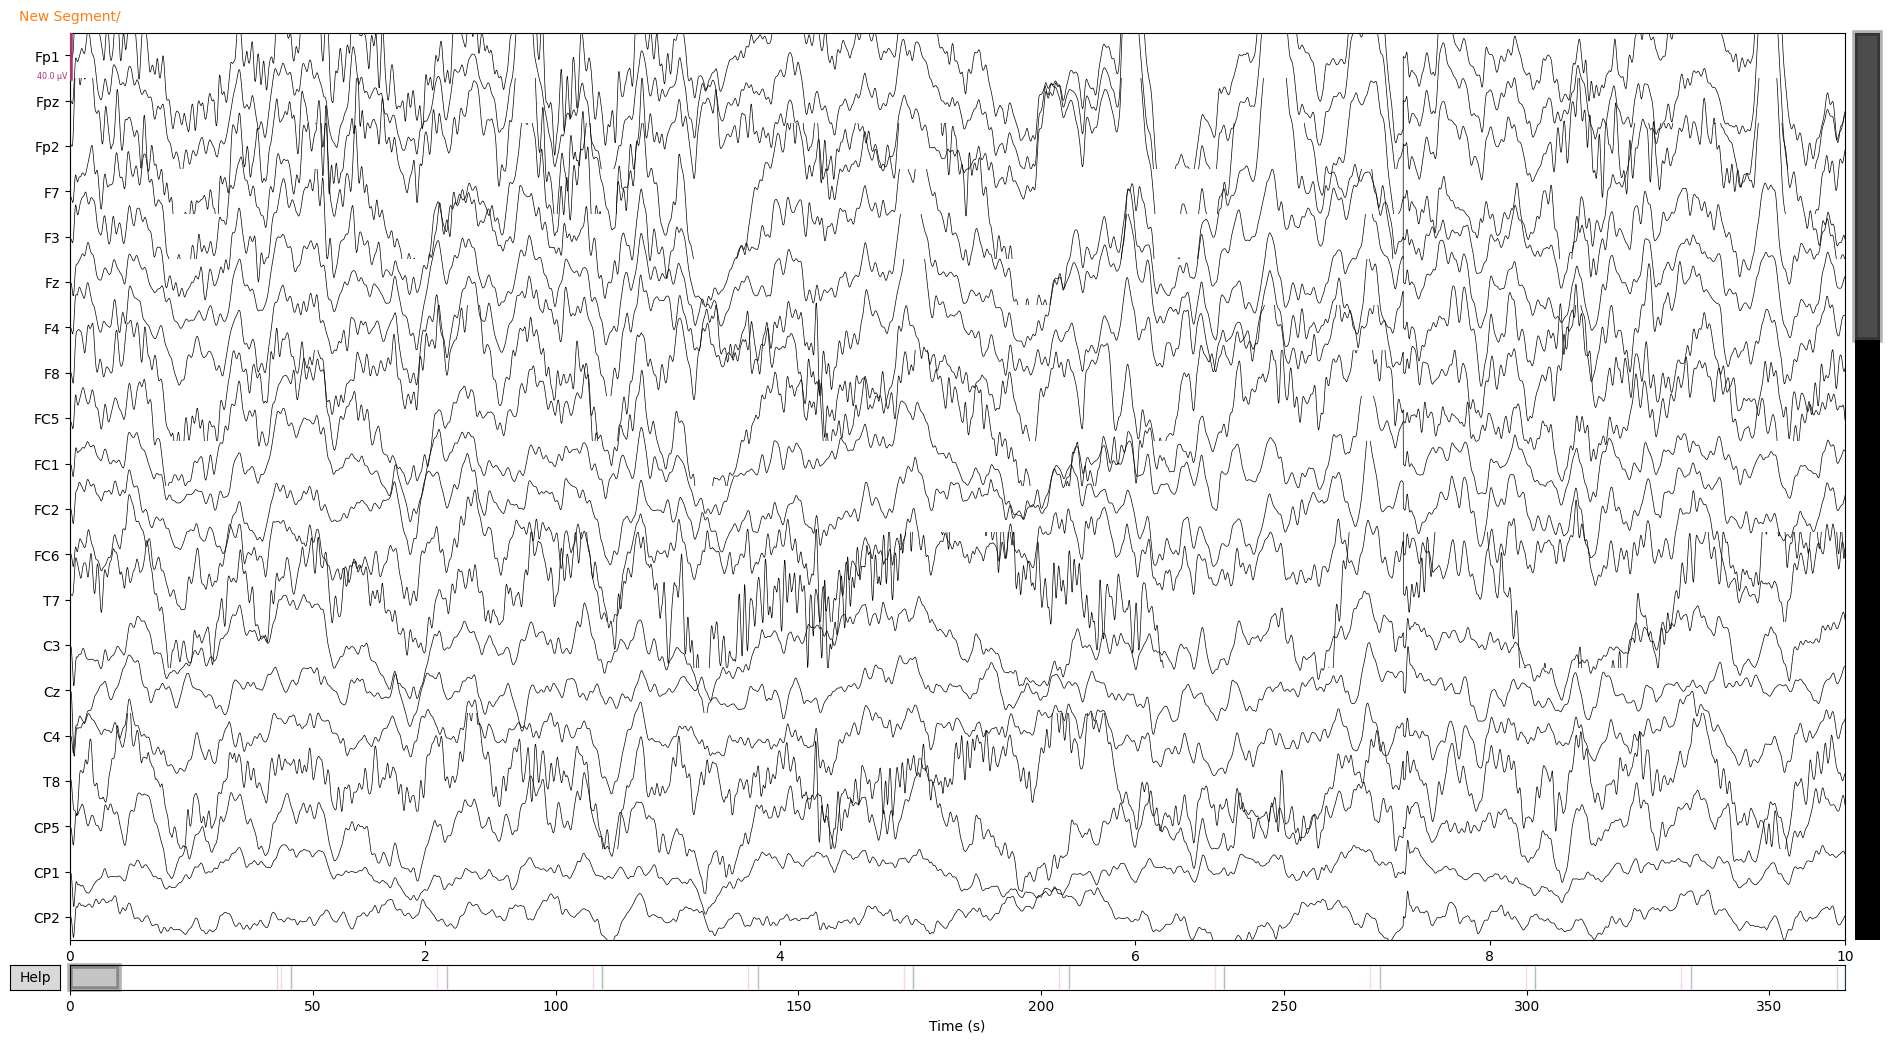

In [19]:
raw_bv_dropped.plot()

In [14]:
raw_bd_filtered = raw_bv_dropped.copy()
raw_bd_filtered = raw_bd_filtered.filter(l_freq=1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6759 samples (3.300 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [15]:
biosemi64 = mne.channels.make_standard_montage("biosemi64")
raw_bd_filtered.set_montage(biosemi64)

<RawBrainVision | INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.eeg, 59 x 748678 (365.6 s), ~337.1 MB, data loaded>

In [16]:
raw_bdf_reref_obj = mne.set_eeg_reference(raw_bd_filtered)
raw_bdf_reref = raw_bdf_reref_obj[0]

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [17]:
ica = ICA(n_components=20, random_state=42, max_iter='auto')
ica.fit(raw_bdf_reref)

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 20.1s.


<ICA | raw data decomposition, method: fastica (fit in 51 iterations on 748678 samples), 20 ICA components (59 PCA components available), channel types: eeg, no sources marked for exclusion>

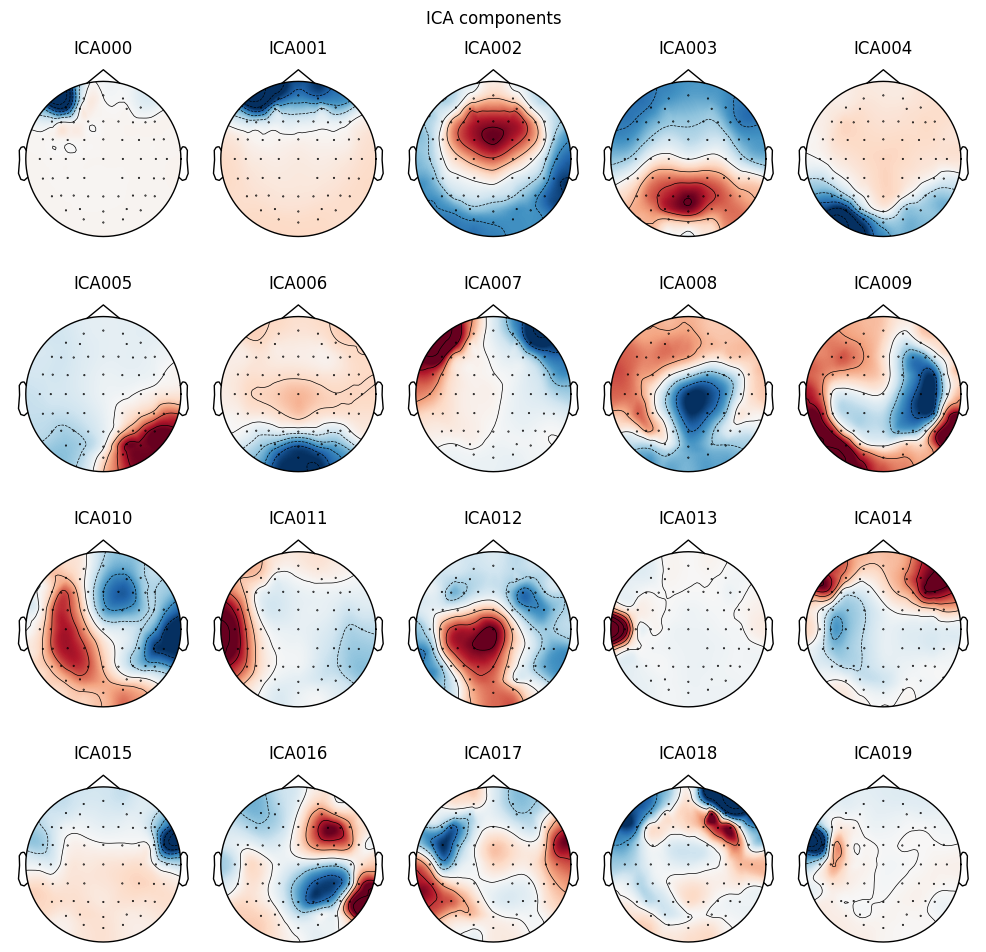

In [18]:
ica.plot_components()


In [20]:
ica.exclude = [0, 1, 4, 7, 11, 13, 15, 19]
raw_bdfr_reconst = raw_bdf_reref.copy()
ica.apply(raw_bdfr_reconst)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 8 ICA components
    Projecting back using 59 PCA components


<RawBrainVision | INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.eeg, 59 x 748678 (365.6 s), ~337.1 MB, data loaded>

In [21]:
raw_bv_reconst_reref = raw_bdfr_reconst.copy()
raw_bv_reconst_reref.set_montage(biosemi64)

<RawBrainVision | INP0094_v1.4_REST1_Op008_A002_S002_18.12.23.eeg, 59 x 748678 (365.6 s), ~337.1 MB, data loaded>

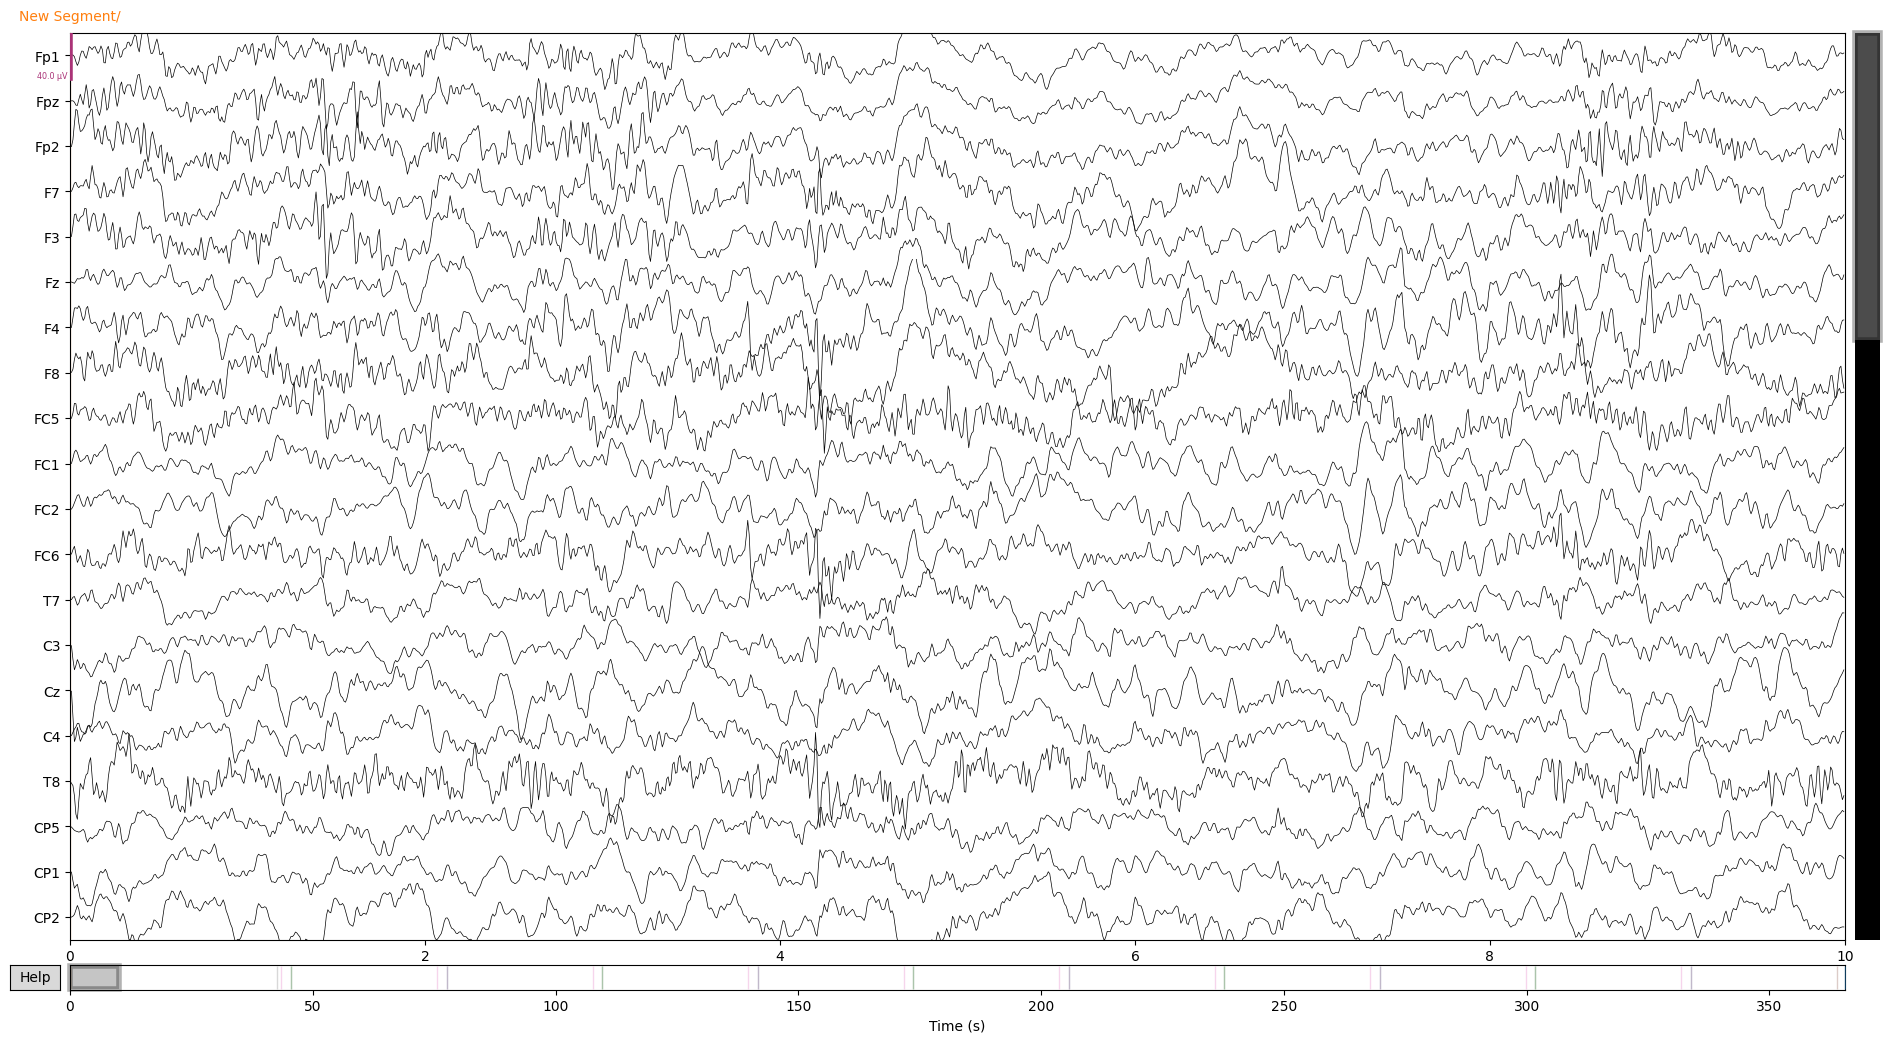

In [22]:
raw_bv_reconst_reref.plot()

In [ ]:
# raw_resample = raw_bv_reconst_reref.copy()#.resample(sfreq=2048)

In [ ]:
# n_optimal, scores = nk.microstates_findnumber(raw_resample.copy().crop(tmin=0, tmax=10), n_max=7, show=True, method='kmod')  
# print("Optimal number of microstates: ", n_optimal)

# MICROSTATES

In [2]:
import mne

# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST1_1pnt_1vis.set')
# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST2_1pnt_1vis.set')
# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST3_1pnt_1vis.set')
# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST1_1pnt_2vis.set')
# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST2_1pnt_2vis.set')
# raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST3_1pnt_2vis.set')

/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_50545/3333717647.py:8: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST3_1pnt_2vis.set')
/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_50545/3333717647.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST3_1pnt_2vis.set')
/var/folders/tt/nr_wg20d5q13z6kxlpj2xsyc0000gn/T/ipykernel_50545/3333717647.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw: mne.io.Raw = mne.io.read_raw_eeglab('rest_14/ACP_INP0014_REST3_1pnt_2vis.set')


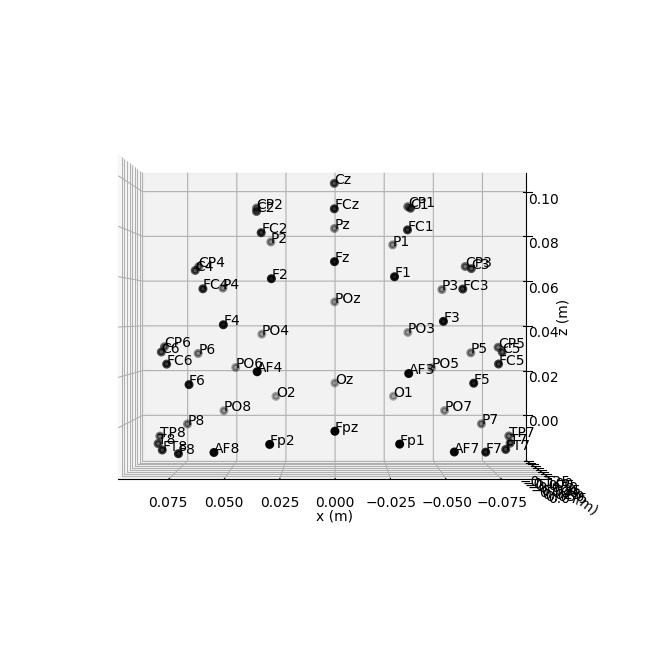

In [8]:
%matplotlib inline
raw.get_montage().plot(kind='3d')

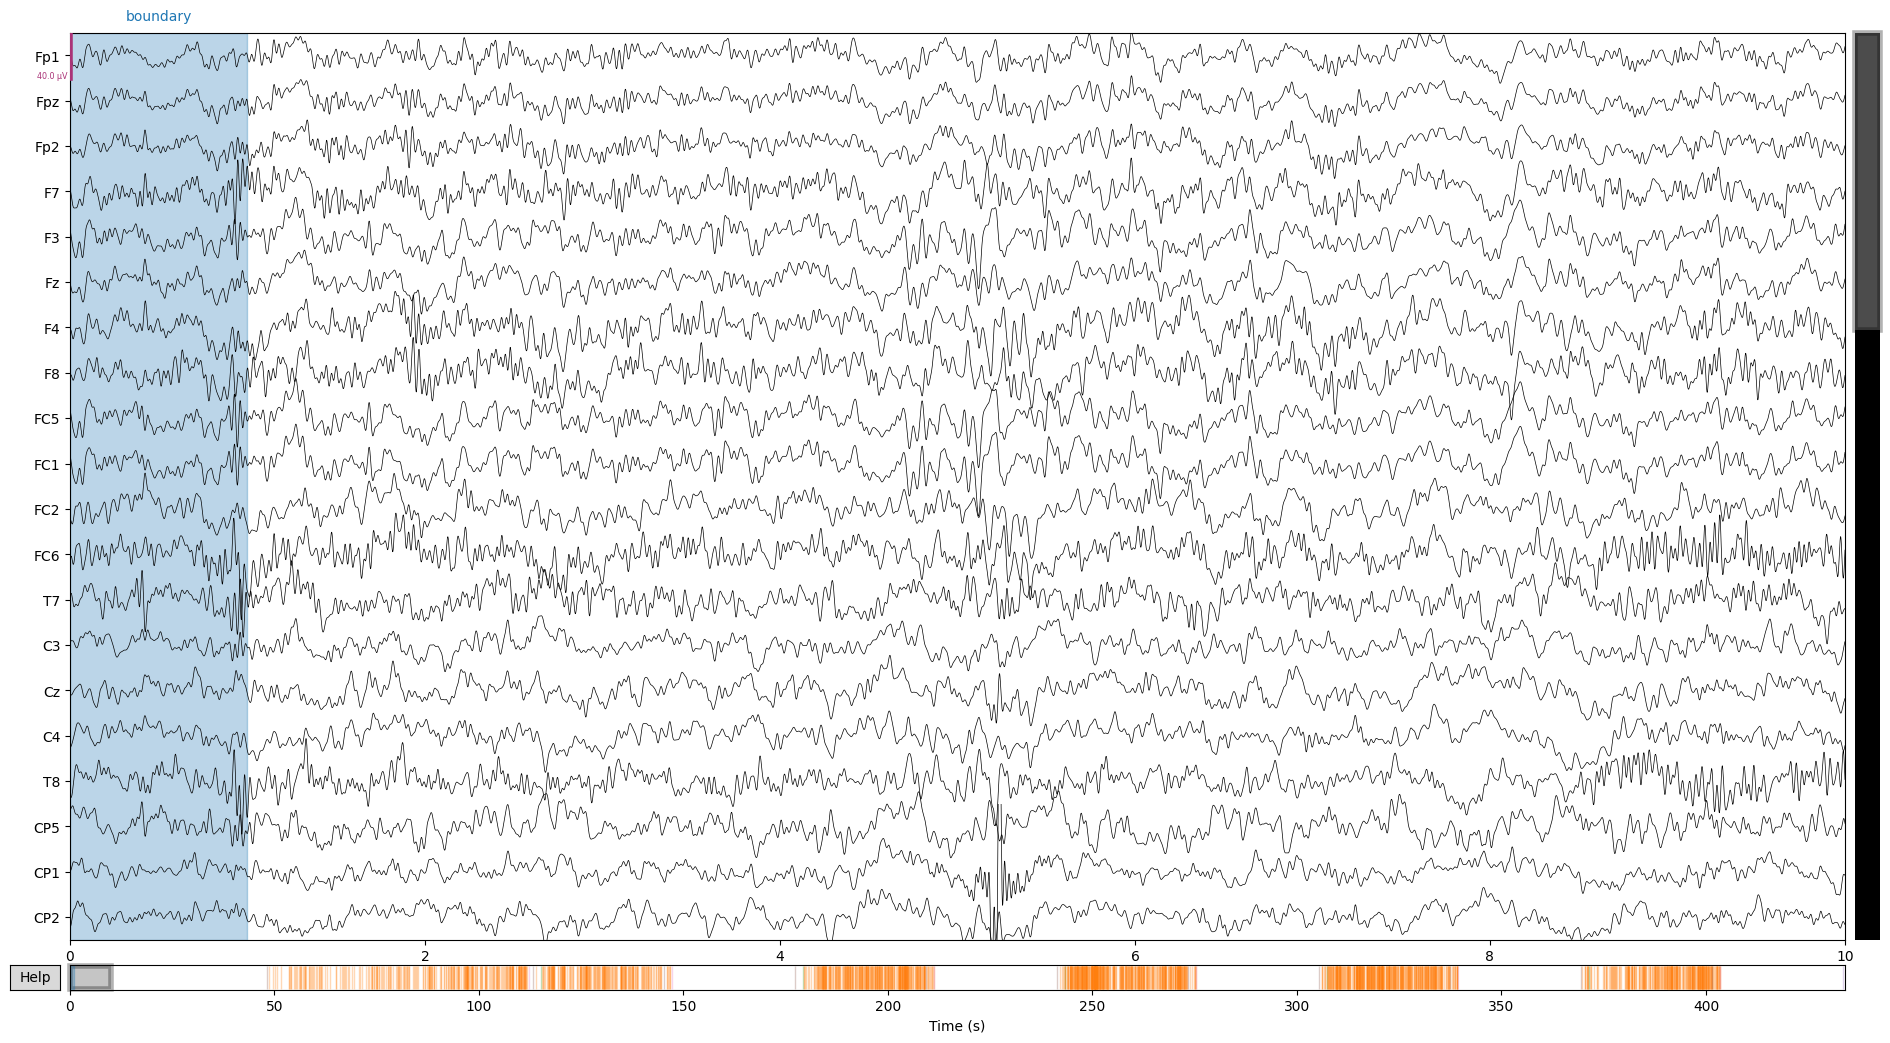

In [10]:
raw.plot()

In [ ]:
raw_resample = raw.copy().resample(sfreq=2048)

In [ ]:
# raw_resample = raw_bv_reconst_reref.copy()
microstates = nk.microstates_segment(raw_resample, n_microstates=4, method='kmod', random_state=42, optimize=True)

In [ ]:
microstates['GEV']

In [ ]:
def split_ms_sequence(ms, start_sample = 0, end_sample = 0, sampling_rate=2048, start_time=0, time_end=0):
    ms_copy = ms.copy()

    if time_end != 0 and end_sample != 0:
        raise ValueError("Only one of time_end or end_sample should be set")

    if time_end != 0:
        end_sample = int(time_end * sampling_rate)
    if start_time != 0:
        start_sample = int(start_time * sampling_rate)

    ms_copy['Sequence'] = ms_copy['Sequence'][start_sample:end_sample]
    ms_copy['GFP'] = ms_copy['GFP'][start_sample:end_sample]
    return ms_copy

In [ ]:
ms_test = split_ms_sequence(microstates, start_time=0, time_end=1)

In [ ]:
def apply_basic_switch_threshold(ms, threshold=0.05, sampling_rate=2048):
    ms_clone = ms.copy()
    sequence = ms_clone['Sequence'].copy()
    gfp = ms_clone['GFP']
    threshold_samples = threshold * sampling_rate
    print("Threshold samples", threshold_samples)
    while True:
        while True:
            intervals = []
            candidates = []
            for i in range(len(sequence)-1):
                if sequence[i] != sequence[i+1]:
                    intervals.append((i, (i - intervals[-1][0] if len(intervals) > 0 else i), sequence[i-1]))
            intervals.append((len(sequence)-1, len(sequence)-1 - intervals[-1][0], sequence[-1], (len(sequence)-1)/2048))
            # print(np.array(intervals))
            i = 1
            while i < len(intervals)-1:
                if (intervals[i][1] < threshold_samples) and (intervals[i-1][2] == intervals[i+1][2]):
                    # length = intervals[i][1] + intervals[i-1][1] + intervals[i+1][1]
                    candidates.append((intervals[i-1], intervals[i], intervals[i+1]))
                    i += 2
                i += 1
            if len(candidates) == 0:
                break
            for candidate in candidates:
                start = candidate[0][0]
                end = candidate[1][0] + 1
                state = candidate[0][2]
                # print("Filling candidate", start, end, state)
                # nk.microstates_plot(ms_clone, epoch = (start-50, end+50))
                sequence[start:end] = state
                # ms_clone['Sequence'] = sequence
                # nk.microstates_plot(ms_clone, epoch = (start-50, end+50))
            # time.sleep(500)
        # ms_clone['Sequence'] = sequence
        # nk.microstates_plot(ms_clone, epoch = (0, int(2048)))
        print("Second stage candidates")
        
        # while True:
        intervals = []
        candidates = []
        local_gfp_mean = 0
        for i in range(len(sequence)-1):
            local_gfp_mean += gfp[i]
            if sequence[i] != sequence[i+1]:
                # print("Adding sequence", i, "State", sequence[i], "State", sequence[i+1])
                length = (i - intervals[-1][0] if len(intervals) > 0 else i)
                state = sequence[i-1]
                local_gfp_mean /= length
                intervals.append((i, length, state, local_gfp_mean))
                local_gfp_mean = 0
        intervals.append((len(sequence)-1, len(sequence)-1 - intervals[-1][0], sequence[-1], 0))
        # print(intervals)
        i = 1
        while i < len(intervals)-1:
            # print("Checking interval", intervals[i], threshold_samples)
            if intervals[i][1] < threshold_samples:
                # gfp_diff_l = intervals[i][3] - intervals[i-1][3]
                # gfp_diff_r = intervals[i][3] - intervals[i+1][3]
                # print("GFP diff", gfp_diff_l, gfp_diff_r)
                ln_diff_l = (intervals[i][1] - intervals[i-1][1])
                ln_diff_r = intervals[i][1] - intervals[i+1][1]
                if ln_diff_l > 0 and ln_diff_r > 0:
                    i += 1
                    continue

                # gfp_diff_l = intervals[i][3] - intervals[i-1][3]
                # gfp_diff_r = intervals[i][3] - intervals[i+1][3]
    
                # print("LN diff", ln_diff_l, ln_diff_r, intervals[i][1])
    
                # if gfp_diff_l > gfp_diff_r:
                if ln_diff_l < ln_diff_r:
                    candidates.append((intervals[i-1], intervals[i], intervals[i-1][2]))
                else:
                    candidates.append((intervals[i-1], intervals[i], intervals[i+1][2]))
                i += 2
            i += 1
        if len(candidates) == 0:
            break
        # start_min = 10000000
        # end_max = 0
        for candidate in candidates:
            start = candidate[0][0]
            # if start < start_min:
            #     start_min = start
            end = candidate[1][0]+1
            # if end > end_max:
            #     end_max = end
            state = candidate[2]
            # print("Filling candidate", start, end, state)
            # nk.microstates_plot(ms_clone, epoch = (start-40, end+40))
            sequence[start:end] = state
            # ms_clone['Sequence'] = sequence
            # nk.microstates_plot(ms_clone, epoch = (start-40, end+40))
            # print('------')
    # print(sequence[:100])
    ms_clone['Sequence'] = sequence
    return ms_clone

In [ ]:
%matplotlib qt

# nk.microstates_plot(microstates, epoch = (0, int(2048)))

test01 = apply_basic_switch_threshold(ms_test, threshold=0.01)
test02 = apply_basic_switch_threshold(ms_test, threshold=0.02)
test04 = apply_basic_switch_threshold(ms_test, threshold=0.04)
test08 = apply_basic_switch_threshold(ms_test, threshold=0.08)
test16 = apply_basic_switch_threshold(ms_test, threshold=0.16)
test32 = apply_basic_switch_threshold(ms_test, threshold=0.32)
# test   
nk.microstates_plot(test01, epoch = (0, int(2048)))
nk.microstates_plot(test02, epoch = (0, int(2048)))
nk.microstates_plot(test04, epoch = (0, int(2048)))
nk.microstates_plot(test08, epoch = (0, int(2048)))
nk.microstates_plot(test16, epoch = (0, int(2048)))
nk.microstates_plot(microstates, epoch = (0, int(2048)))


In [652]:
%matplotlib qt
nk.microstates_plot(test, epoch = (0, int(2048)))

Microstate_0_Proportion  Microstate_1_Proportion  Microstate_2_Proportion  \
0                 0.259252                 0.227144                 0.233703   

   Microstate_3_Proportion  Microstate_0_LifetimeDistribution  \
0                 0.279901                             5796.5   

   Microstate_1_LifetimeDistribution  Microstate_2_LifetimeDistribution  \
0                             6019.0                             5128.5   

   Microstate_3_LifetimeDistribution  Microstate_0_DurationMean  \
0                             6165.5                   0.019263   

   Microstate_0_DurationMedian  Microstate_1_DurationMean  \
0                     0.013184                   0.016227   

   Microstate_1_DurationMedian  Microstate_2_DurationMean  \
0                     0.012207                   0.019668   

   Microstate_2_DurationMedian  Microstate_3_DurationMean  \
0                     0.013672                   0.019514   

   Microstate_3_DurationMedian  Microstate_Average_DurationMean  \
0                     0.013672                         0.018628   

   Microstate_Average_DurationMedian  
0                           0.013184

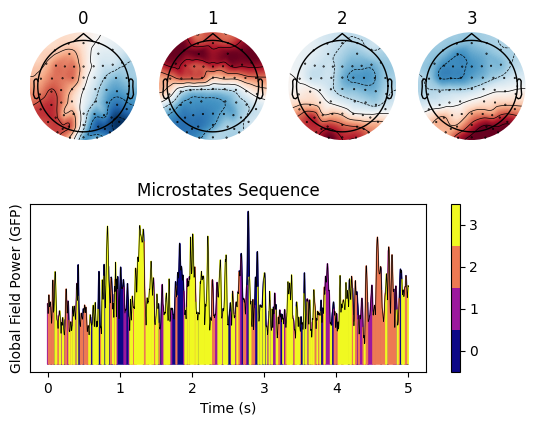

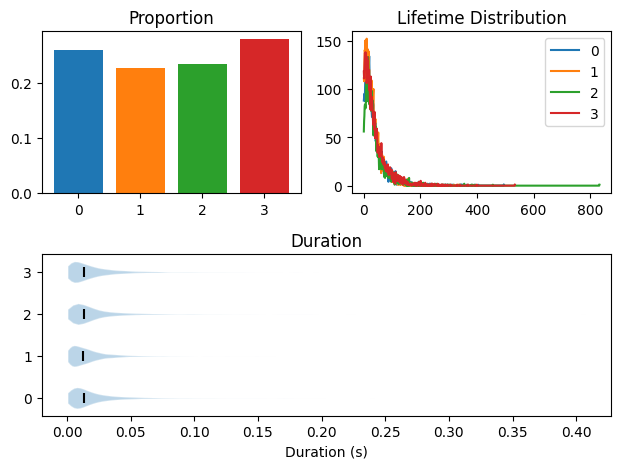

In [537]:
nk.microstates_plot(microstates, epoch = (0, 2048*5))
nk.microstates_static(microstates, sampling_rate=sampling_rate, show=True)

In [280]:
def check_event_name(pair, key_names):
    print(pair)
    key, value = pair
    for key_name in key_names:
        if key_name in key:
            return True
    return False

def get_event_bounds_by_event_transitions(raw, _key_names, _key_namings, _transitions, time_threshold = 20, sampling_rate=2048):
    raw_events = mne.events_from_annotations(raw)
    event_sequence = list(map(lambda x: [x[0], x[2]] ,raw_events[0]))
    event_namemap = dict(filter(lambda x: check_event_name(x, _key_names), raw_events[1].items()))
    event_numbers = list(event_namemap.values())
    threshold_samples = time_threshold * sampling_rate

    def get_event_number(event_name, _ev_namemap):
        return list(filter(lambda val: event_name in val[0], _ev_namemap.items()))[0]
    
    def remap_transitions_to_numbers(trans, ev_namemap):
        remapped_transitions = []
        for transition in trans:
            remapped_transitions.append(
                [get_event_number(transition[0], ev_namemap)[1], list(map(lambda x: get_event_number(x, ev_namemap)[1], transition[1]))]
            )   
        return remapped_transitions
    
    transition_numbers = remap_transitions_to_numbers(transitions, event_namemap)
    filtered_sequence = list(filter(lambda x: x[1] in event_numbers, event_sequence))
    timestamps = []
    events = []
    for idx in range(len(filtered_sequence)):
        event = filtered_sequence[idx]
        next_event = filtered_sequence[idx+1] if idx+1 < len(filtered_sequence) else None
        # print("Idx", idx, "Event", event, "Next event", next_event)
        if next_event is None:
            break
        for transition in transition_numbers:
            if (event[1] == transition[0]) and (next_event[1] in transition[1]):
                if threshold_samples > next_event[0] - event[0]:
                    print("Event too short, skipping", next_event[0] - event[0], event, next_event)
                    break
                timestamps.append([event[0], next_event[0]])
                events.append(event[1])
                break
    event_names = dict(map(lambda x: (get_event_number(x[0], event_namemap)[1], x[1]), _key_namings.items()))
    return timestamps, events, event_names

In [285]:
import numpy as np

raw_events = mne.events_from_annotations(raw)
# raw_events[0]
# type(raw_events[0]
ls = list(filter(lambda x: x[2] != 2, raw_events[0]))
np.array(ls)




Used Annotations descriptions: ['boundary', 's1', 's11', 's2', 's3', 's4']


array([[     0,      0,      1],
       [ 98510,      0,      5],
       [229633,      0,      6],
       [231717,      0,      5],
       [235852,      0,      3],
       [297318,      0,      5],
       [301452,      0,      6],
       [362918,      0,      5],
       [367053,      0,      3],
       [428518,      0,      5],
       [432652,      0,      6],
       [494119,      0,      5],
       [498253,      0,      3],
       [559719,      0,      5],
       [563853,      0,      6],
       [625319,      0,      5],
       [629454,      0,      3],
       [690919,      0,      5],
       [695053,      0,      6],
       [756519,      0,      5],
       [760654,      0,      3],
       [822120,      0,      5],
       [826254,      0,      6],
       [887720,      0,      4]])

In [282]:
raw_events[1]

{'boundary': 1, 's1': 2, 's11': 3, 's2': 4, 's3': 5, 's4': 6}

In [286]:
transitions = [['s11', ['s2', 's3', 's4']], ['s4', ['s2', 's3']]]
# transitions = [['s11', ['s2', 's3']], ['s12', ['s2', 's3']]] # 14 - d1
# transitions = [['s11', ['s2', 's3']], ['s4', ['s2', 's3']]] # 14 - d2

key_names = ['s11', 's2', 's3', 's4']
# key_names = ['s11', 's12', 's2', 's3'] # 14 - d1
# key_names = ['s11', 's4', 's2', 's3'] # 14 - d2

key_namings = {'s11': "Closed", 's4': "Opened"}
# key_namings = {'s11': "Closed", 's12': "Opened"} # 14 - d1
# key_namings = {'s11': "Closed", 's4': "Opened"} # 14 - d2

# 6 - 4 6 - 5 | S(4 - 2 4 - 3)
# 3 - 4 3 - 5 | S(11 - 2 11 - 3)

# 7 - 5 7 - 6 | S(4-2 4-3)
# 4 - 5 4 - 6 | S(11-3 11-2)

# 4 - 7 4 - 6  | S(11-3 11-2)
# 8 - 7 8 - 6  | S(4-3 4-2)
 
# 4-6 4-7 4-5 ЗАКРЫТЫЕ S(11-3 11-4 11-2) 
# 7-6 7-5 ОТКРЫТЫЕ S(4-3 4-2)


# 
# Checking event:  51.1650390625 6
# Checking event:  51.17724609375 6
# Checking event:  109.24658203125 6
# Checking event:  158.2109375 7
# Checking event:  159.22900390625 6

#-4 Checking event:  161.248046875 4
#-6 Checking event:  191.26025390625 6

#-7 Checking event:  193.27880859375 7
#-6 Checking event:  223.291015625 6

#?4 Checking event:  225.31005859375 4
#?6

#-7 Checking event:  257.3408203125 7
#-6 Checking event:  287.353515625 6

#-4 Checking event:  289.37255859375 4
#-6 Checking event:  319.384765625 6

#-7 Checking event:  321.4033203125 7
#-6 Checking event:  351.416015625 6

#?4 Checking event:  353.43505859375 4
#?6

#-7 Checking event:  385.4658203125 7
#-6 Checking event:  415.478515625 6

#-4 Checking event:  417.49755859375 4
#?6

#-7 Checking event:  449.5283203125 7
#-5 Checking event:  479.541015625 5

print(get_event_bounds_by_event_transitions(raw_resample, key_names, key_namings, transitions))

Used Annotations descriptions: ['boundary', 's1', 's11', 's2', 's3', 's4']
('boundary', 1)
('s1', 2)
('s11', 3)
('s2', 4)
('s3', 5)
('s4', 6)
Event too short, skipping 2084 [229633, 6] [231717, 5]
([[235852, 297318], [301452, 362918], [367053, 428518], [432652, 494119], [498253, 559719], [563853, 625319], [629454, 690919], [695053, 756519], [760654, 822120], [826254, 887720]], [3, 6, 3, 6, 3, 6, 3, 6, 3, 6], {3: 'Closed', 6: 'Opened'})


In [288]:
def split_ms_sequence_by_events(ms, raw, key_names, key_namings, transitions):
    timestamps, events, event_names = get_event_bounds_by_event_transitions(raw, key_names, key_namings, transitions)
    sequences = []
    for i in range(len(timestamps)):
        ms_copy = split_ms_sequence(ms, start_sample=timestamps[i][0], end_sample=timestamps[i][1])
        sequences.append(ms_copy)
    return sequences, events, event_names, timestamps

In [289]:
ms_sequences, events, event_names, timestamps = split_ms_sequence_by_events(microstates, raw_resample, key_names, key_namings, transitions)
event_names

Used Annotations descriptions: ['boundary', 's1', 's11', 's2', 's3', 's4']
('boundary', 1)
('s1', 2)
('s11', 3)
('s2', 4)
('s3', 5)
('s4', 6)
Event too short, skipping 2084 [229633, 6] [231717, 5]


{3: 'Closed', 6: 'Opened'}

In [290]:
import pandas as pd

dynamic = pd.DataFrame()

for i in range(len(ms_sequences)):
    print("Event: ", event_names[events[i]])
    duration = (timestamps[i][1] - timestamps[i][0])
    # nk.microstates_plot(ms_sequences[i], epoch = (0, duration))
    # nk.microstates_static(ms_sequences[i], sampling_rate=sampling_rate, show=True)
    ms_dynamic = nk.microstates_dynamic(ms_sequences[i], show=False)
    ms_dynamic['Event'] = event_names[events[i]]
    ms_dynamic['Order'] = i
    dynamic = pd.concat([dynamic, ms_dynamic])
    # nk.microstates_dynamic(ms_sequences[i], show=True)

Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened
Event:  Closed
Event:  Opened


In [291]:
def drop_self_to_self(_microstates, df):
    clone = df.copy()
    for i in range (len(_microstates['Microstates'])):
        print(f'Microstate_{i}_to_{i}')
        clone.drop(f'Microstate_{i}_to_{i}', axis=1, inplace=True)
    return clone


In [292]:
dyn_dropped = drop_self_to_self(microstates, dynamic)

Microstate_0_to_0
Microstate_1_to_1
Microstate_2_to_2
Microstate_3_to_3


In [293]:
def mean_by_event(df):
    clone = df.copy()
    clone.drop('Order', axis=1, inplace=True)
    return clone.groupby('Event').mean()

In [294]:
mean = mean_by_event(dyn_dropped)

<Axes: >

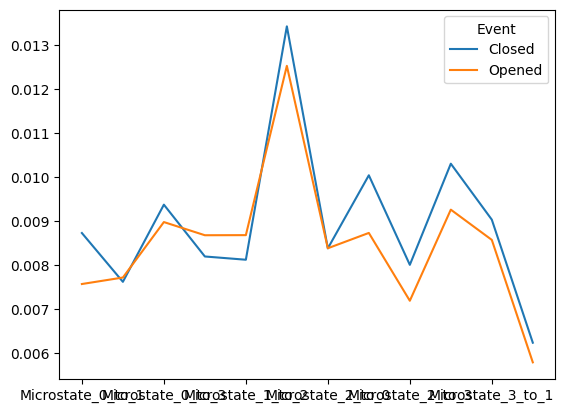

In [295]:
mean.T.plot()

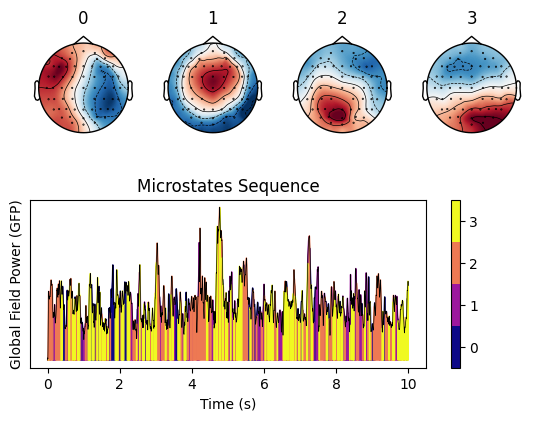

In [19]:
%matplotlib inline
# ms.plot_maps(maps, raw_bv_reconst_reref.info)
nk.microstates_plot(microstates, epoch = (0, 2048*10))

Microstate_0_Proportion  Microstate_1_Proportion  Microstate_2_Proportion  \
0                 0.204609                 0.249722                 0.263886   

   Microstate_3_Proportion  Microstate_0_LifetimeDistribution  \
0                 0.281783                             3136.0   

   Microstate_1_LifetimeDistribution  Microstate_2_LifetimeDistribution  \
0                             3225.0                             3443.0   

   Microstate_3_LifetimeDistribution  Microstate_0_DurationMean  \
0                             3554.5                   0.023723   

   Microstate_0_DurationMedian  Microstate_1_DurationMean  \
0                     0.017578                   0.028141   

   Microstate_1_DurationMedian  Microstate_2_DurationMean  \
0                      0.02002                   0.027929   

   Microstate_2_DurationMedian  Microstate_3_DurationMean  \
0                     0.020508                   0.028798   

   Microstate_3_DurationMedian  Microstate_Average_DurationMean  \
0                      0.02002                         0.027224   

   Microstate_Average_DurationMedian  
0                           0.019531

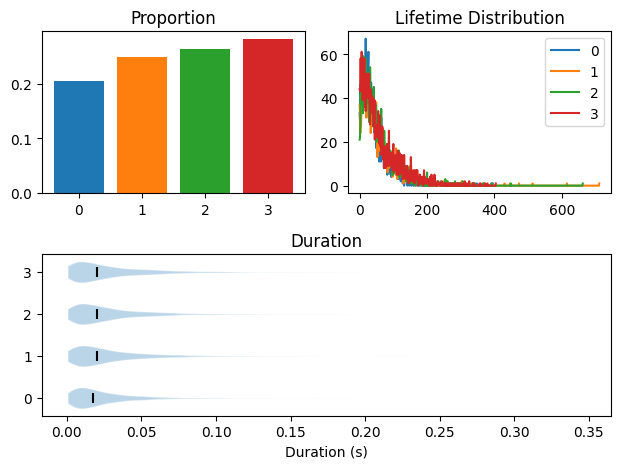

In [109]:
# ms.plot_segmentation(segmentation[:2048], raw_bv_reconst_reref.get_data()[:, :2048], raw_bv_reconst_reref.times[:2048])
nk.microstates_static(microstates, sampling_rate=sampling_rate, show=True)

Microstate_0_to_0  Microstate_0_to_1  Microstate_0_to_2  Microstate_0_to_3  \
0           0.979462           0.006365           0.007272             0.0069   

   Microstate_1_to_0  Microstate_1_to_1  Microstate_1_to_2  Microstate_1_to_3  \
0           0.004922           0.983096           0.005442           0.006539   

   Microstate_2_to_0  Microstate_2_to_1  Microstate_2_to_2  Microstate_2_to_3  \
0           0.005742           0.006222           0.982666           0.005369   

   Microstate_3_to_0  Microstate_3_to_1  Microstate_3_to_2  Microstate_3_to_3  
0           0.005233           0.007295           0.005019           0.982453

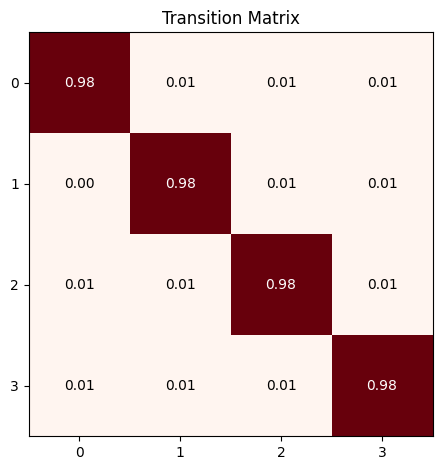

In [100]:
nk.microstates_dynamic(microstates, show=True)

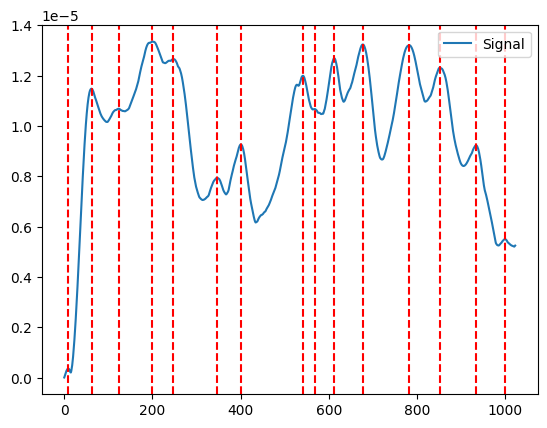

In [101]:
gfp = nk.eeg_gfp(raw_resample)

peaks = nk.microstates_peaks(raw_resample, gfp=gfp)

# Plot the peaks in the first 200 data points
nk.events_plot(events = peaks[peaks < int(2048/2)], signal = gfp[0:int(2048/2)])